# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [105]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [106]:
df = pd.read_csv("/content/heights.csv")

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


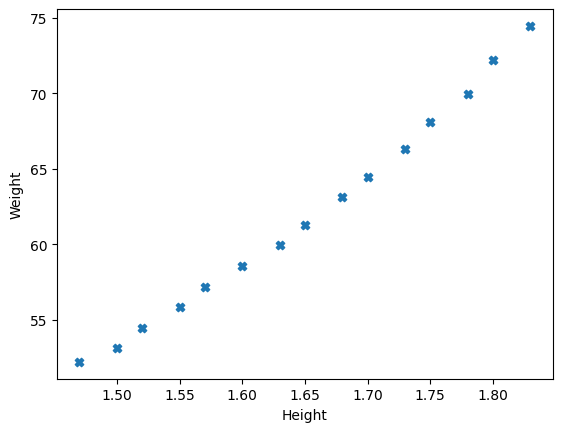

In [109]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [110]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [111]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):

        self.lr = lr
        self.epochs = epochs
        self.m=None
        self.c=np.random.randn()



    def train(self, X, Y):

        n, features = X.shape
        self.m = np.zeros(features) # Initialize weights
        self.c = 0        # Initialize bias
        n=len(Y)
        for _ in range(self.epochs):
            Y_pred = np.dot(X, self.m) + self.c
            D_m = (-2 / n) * np.dot(X.T, (Y - Y_pred))
            D_c = (-2 / n) * np.sum(Y - Y_pred)

            self.m = self.m - self.lr * D_m
            self.c = self.c - self.lr * D_c


    def predict(self, X):

        return np.dot(X, self.m) + self.c


### Build the model and train on the dataset.

In [112]:
model = LinearRegression(0.01, 10000)
model.train(X_train, y_train)

### (10 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [113]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    mse = np.mean((y_pred- y_actual) ** 2)
    rmse = np.sqrt(mse)
    return rmse



### Make predictions using the model and evaluate it.

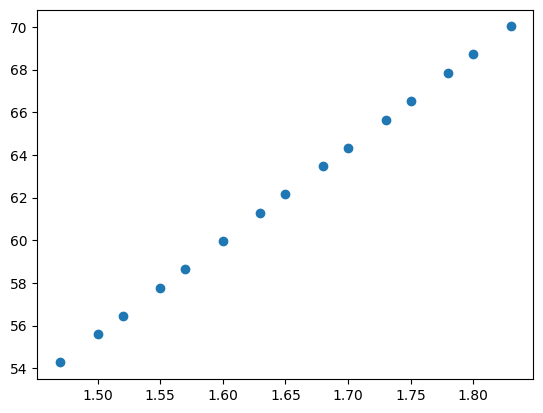

Train MSE: 2.0615


In [114]:
y_pred = model.predict(X_train)
plt.scatter(X_train,y_pred)
plt.show()
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

### Plot the predicted and the actual values.

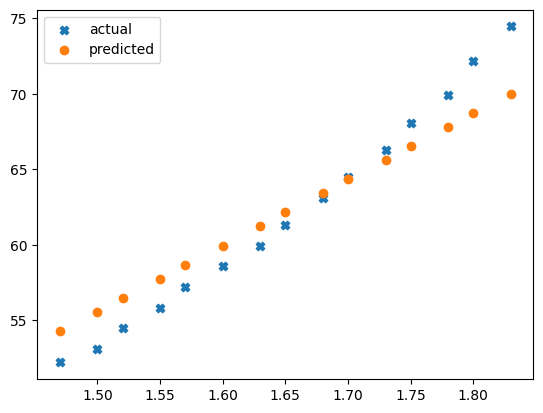

In [115]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [116]:
df = pd.read_csv('/content/advertise.csv')

In [117]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [118]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### Split the data into train and test set.

In [119]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [120]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [121]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]


### Build the model and train on the dataset.

In [122]:
model = LinearRegression(0.001, 100000)
model.train(X_train, y_train)

<ipython-input-111-33bb805544fe>:24: RuntimeWarning: invalid value encountered in subtract
  self.m = self.m - self.lr * D_m


### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [123]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: nan
Test MSE: nan


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [213]:
df = pd.read_csv('/content/heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [215]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)


### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [218]:
from math import e
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        self.lr = lr
        self.epochs = epochs
        self.w=None
        self.b=np.random.randn()

    # Function for model training
    def train(self, X, y):
        y=1-y
        m,features=X.shape
        self.w=np.zeros(features)
        for _ in range(self.epochs):
          self.update_weights(X,y,m)
    def update_weights(self, X, y, m):
        y_pred=self.predict(X)
        d_w=(1/m)*np.dot(X.T,(y_pred-y))
        d_b=(1/m)*np.sum(y-y_pred)
        self.w-=self.lr*d_w
        self.b-=self.lr*d_b
    def predict(self, X):
        return 1/(1+e**(-np.dot(X,self.w)-self.b))



### Build the model and train on the dataset.

In [219]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (20 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [221]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values
    Returns:
        The accuracy.
    """
    count=0
    for i in range(len(y_pred)):
      if y_pred[i]==y_actual[i]:
        count+=1
    return count/len(y_pred)



### Make predictions using the model and evaluate it.

In [222]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 0.8666666666666667


### Plot the predicted and the actual values.

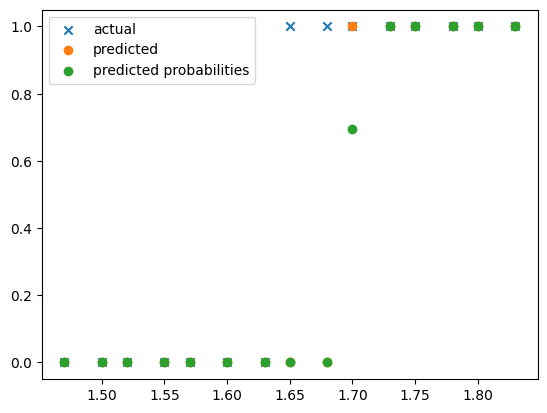

In [223]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()